In [3]:
import pandas as pd
import numpy as np
import os


import sys
sys.path.append('..')
from src.preprocess import get_train_test

DATA_PATH = '../input/'


In [4]:
data = get_train_test(0)
data.head()

/home/yoshikawa/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):
../src/preprocess.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_180_cart_log['price'] = before_180_cart_log['JAN'].map(JAN2price) * before_180_cart_log['n_items']


,session_id,registor_number,user_id,sex,age,distance_to_the_store,start_at__date,start_at__hour,test,target,...,user_WE_26_nanmean,user_WE_26_std,user_WE_27_nanmean,user_WE_27_std,user_WE_28_nanmean,user_WE_28_std,user_WE_29_nanmean,user_WE_29_std,user_WE_30_nanmean,user_WE_30_std
0,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,0,0,0,62.0,2.0,2021-12-04,11,False,0,...,0.030794,0.329416,0.244441,0.320449,0.324791,0.303637,-0.421382,0.324410,-0.396573,0.280675
1,00011e97d485ffb7f78662972da6032d4103b1628d541f...,1,1,0,57.0,4.0,2021-11-18,19,False,0,...,0.054608,0.244699,0.089448,0.331640,0.280600,0.248957,-0.247145,0.262191,-0.422945,0.274394
2,000280d2156d179a597167b269a69e5af556725eeaabae...,2,2,0,37.0,17.0,2022-01-25,13,True,255,...,-0.123476,0.320114,0.050099,0.353777,0.438083,0.395284,-0.427736,0.314988,-0.516204,0.366581
3,0002a4a49d2230456ce57f9709b7c97e1ee324906f4ed8...,3,3,0,32.0,18.0,2021-12-20,17,False,0,...,-0.224175,0.243791,-0.006267,0.283090,0.404802,0.324370,-0.355561,0.320855,-0.358523,0.320629
4,000383cb2018d041d4976a0e26d2dc0b73918abd5a30c9...,4,4,0,27.0,2.0,2021-11-11,8,False,0,...,0.000492,0.308228,-0.085524,0.343413,0.394095,0.338470,-0.237824,0.345600,-0.392346,0.369747


In [5]:
data.isnull().sum()

session_id               0
registor_number          0
user_id                  0
sex                      0
age                      0
                      ... 
user_WE_28_std        1610
user_WE_29_nanmean    1610
user_WE_29_std        1610
user_WE_30_nanmean    1610
user_WE_30_std        1610
Length: 89, dtype: int64

In [6]:
data.describe()

,age,distance_to_the_store,start_at__hour,target,holiday,cart_n_items_sum,cart_duration_min,cart_duration_max,cart_JAN_count,cart_JAN_nunique,...,user_WE_26_nanmean,user_WE_26_std,user_WE_27_nanmean,user_WE_27_std,user_WE_28_nanmean,user_WE_28_std,user_WE_29_nanmean,user_WE_29_std,user_WE_30_nanmean,user_WE_30_std
count,109161.0,109161.0,109161.000000,109161.000000,109161.000000,109130.000000,109130.000000,109130.000000,109130.000000,109130.000000,...,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000,107551.000000
mean,NaN,NaN,14.360431,60.383012,0.045181,2.368652,11.692651,111.162091,2.771612,1.994410,...,-0.033384,0.327107,0.034154,0.337595,0.383775,0.319432,-0.280555,0.328516,-0.450513,0.329481
std,0.0,0.0,3.997977,108.334199,0.207702,2.368826,11.913228,58.347655,2.596360,1.688289,...,0.095941,0.065867,0.100469,0.073083,0.089176,0.061677,0.101485,0.059582,0.102273,0.061804
min,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.901074,0.002704,-0.543706,0.006292,-0.533038,0.006060,-1.145198,0.003738,-1.337670,0.001474
25%,37.0,2.0,11.000000,0.000000,0.000000,1.000000,6.000000,68.000000,1.000000,1.000000,...,-0.090918,0.288489,-0.024599,0.302045,0.334624,0.283036,-0.342678,0.294067,-0.505847,0.292236
50%,52.0,3.0,15.000000,0.000000,0.000000,2.000000,9.000000,131.000000,2.000000,2.000000,...,-0.040992,0.323941,0.026063,0.328736,0.378482,0.316187,-0.287441,0.324482,-0.454568,0.324622
75%,62.0,7.0,17.000000,1.000000,0.000000,3.000000,13.000000,161.000000,4.000000,3.000000,...,0.015782,0.361505,0.080501,0.359329,0.427524,0.351561,-0.227733,0.355862,-0.398310,0.359777
max,100.0,100.0,23.000000,255.000000,1.000000,99.000000,179.000000,179.000000,64.000000,43.000000,...,1.039343,0.966847,1.542610,1.379950,1.856595,0.845661,0.584928,0.955013,0.356323,0.919454


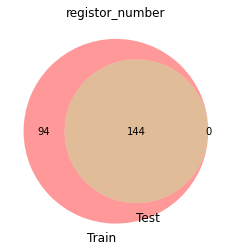

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from typing import List

# def get_uniques(input_df: pd.DataFrame, column):
#     s = input_df[column]
#     return set(s.dropna().unique())


# def plot_intersection(
#     left: pd.DataFrame, 
#     right: pd.DataFrame, 
#     target_column: str, 
#     ax: plt.Axes = None, 
#     set_labels: List[str]=None
# ):
#     venn2(
#         subsets=(get_uniques(left, target_column), get_uniques(right, target_column)),
#         set_labels=set_labels or ("Train", "Test"),
#         ax=ax
#     )
#     ax.set_title(target_column)

from kagglelib.visualize import plot_intersection

train = data[data['test']==False]
test = data[data['test']==True]
fig, ax = plt.subplots()
plot_intersection(train, test, target_column='registor_number', ax=ax)


In [8]:
test = pd.read_csv('/home/yoshikawa/work/atmaCup/atmaCup13/save/delete_user_id_register_id/submit.csv')
test.head()

,target
0,0.168435
1,0.037609
2,0.082591
3,0.045168
4,0.047731


/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


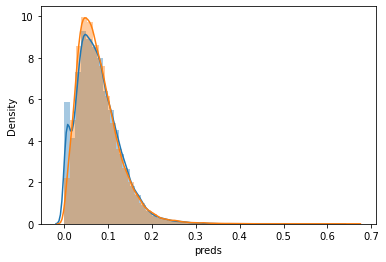

In [9]:

train = pd.read_csv('/home/yoshikawa/work/atmaCup/atmaCup13/save/delete_user_id_register_id/preds.csv')
fig, ax = plt.subplots()
sns.distplot(test['target'], ax=ax, label='Test')
sns.distplot(train['preds'], ax=ax, label='oof')
plt.savefig('oof_test_distplot.png')


In [10]:
data = pd.read_csv(os.path.join(DATA_PATH, "session.csv"))
test_session = pd.read_csv(os.path.join(DATA_PATH, "test_session.csv"))
cart_log = pd.read_csv(os.path.join(DATA_PATH, "cart_log.csv"))
master = pd.read_csv(os.path.join(DATA_PATH, "product_master.csv"))
master_cheese = master[master['category']=='チーズ']


/home/yoshikawa/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
jan2department = dict(zip(master['JAN'], master['department']))
cart_log = cart_log[~cart_log['JAN'].isin(master_cheese['JAN'].unique())]
log_category = cart_log['JAN'].map(jan2department)
log_category.value_counts().sort_values(ascending=True).head(20)

サービス           1
レディースシューズ      5
ピザ             5
未登録等           8
ワークシューズ        9
スポーツ          17
キッズアウター       30
AV家電          34
ゴルフ           55
調理家電          68
メンズシューズ       80
サンダル          83
園芸用品         103
軽家具・収納       112
カスタマー        114
メンズアクセサリー    126
生活家電         130
レディースアウター    153
パジャマ         161
健康・理美容家電     166
Name: JAN, dtype: int64

In [12]:
log_category.head()

0    NaN
1     果物
2     果物
3    和日配
4    和日配
Name: JAN, dtype: object

In [13]:
cart_log.head()

,session_id,duration,action_name,action_detail,item_name,item_detail,item_detail_add_1,item_detail_add_2,coupon_is_activated,JAN,n_items,created_at__date,created_at__hour
0,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,26,PIN入力,PIN入力,キー,****,NaN,NaN,0,NaN,0,2021-12-04,11
1,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,550,買物,商品追加,商品,2533871000000,みかんM 大箱,1.0,0,2.533871e+12,1,2021-12-04,11
2,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,622,買物,商品追加,商品,2533871000000,みかんM 大箱,1.0,0,2.533871e+12,1,2021-12-04,11
3,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,698,買物,商品追加,商品,4972807218857,大盛__白糸こんにゃく５０,1.0,0,4.972807e+12,1,2021-12-04,11
4,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,701,買物,商品追加,商品,4972807218857,大盛__白糸こんにゃく５０,1.0,0,4.972807e+12,1,2021-12-04,11


In [14]:
use_department = log_category.value_counts()
idx = log_category.isin(use_department.index)
_piv = pd.pivot_table(data=cart_log[idx],
                      index="session_id",
                      columns=log_category[idx], 
                      aggfunc="sum",
                      values="n_items")
_piv = _piv.fillna(0).astype(int)
target_columns = _piv.columns.tolist()
_piv.head()

JAN,100円均一,AV家電,おもちゃ,たばこ,アイスクリーム,インテリア,オーラルケア,カスタマー,カー用品,キッズアウター,...,衛生,調理品,調理家電,調理素材,豚肉,軽家具・収納,農産加工,野菜,鶏肉,麺類
session_id,,,,,,,,,,,,,,,,,,,,,
00003ee1b7f34620ae81dba533c6d5a544513004fe5688b2a88560e071799c0e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00011e97d485ffb7f78662972da6032d4103b1628d541f8f0b916fc011a592e6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
000280d2156d179a597167b269a69e5af556725eeaabae21226d755f73bf0bd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0002a4a49d2230456ce57f9709b7c97e1ee324906f4ed8993b579d0ef0ed6135,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,1
000383cb2018d041d4976a0e26d2dc0b73918abd5a30c94179441f321aa598c0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,2,1,5


/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yosh

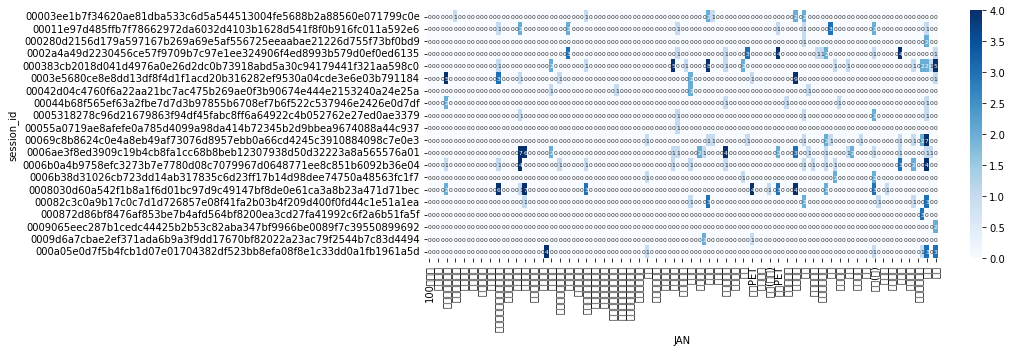

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(_piv.head(20), cmap="Blues", vmin=0, vmax=4, ax=ax, fmt="0d", annot=True, annot_kws={"fontsize": 6})

fig.tight_layout()

In [16]:
same_session_department_df = pd.merge(
        train, 
        _piv, on='session_id', 
        how="left"
    ).groupby("target")[target_columns]\
    .mean()\
    .T


KeyError: 'session_id'

In [ ]:
same_session_department_df["difference"] = same_session_department_df[1] - same_session_department_df[0]
same_session_department_df["difference_ratio"] = same_session_department_df["difference"] / same_session_department_df[0]
same_session_department_df = same_session_department_df.sort_values(1, ascending=False)

In [ ]:
same_session_department_df.sort_values("difference").head(30)


target,0,1,difference,difference_ratio
米飯(麺),0.373672,0.359425,-0.014248,-0.038129
猫フード,0.108897,0.099773,-0.009124,-0.083787
寿司(鮮魚),0.098680,0.093565,-0.005114,-0.051828
和酒,0.071299,0.067676,-0.003623,-0.050817
たばこ,0.013280,0.009992,-0.003287,-0.247547
冷惣菜,0.099957,0.097048,-0.002909,-0.029106
寿司(惣菜),0.059401,0.057381,-0.002020,-0.034006
ワークグッズ,0.004848,0.003179,-0.001669,-0.344178
季節家電,0.002932,0.002271,-0.000661,-0.225506
メンズアウター,0.002150,0.001514,-0.000636,-0.295914
